In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")
import sweetviz as sv

In [17]:
os.chdir('P:\\Users\\amayer\\Documents\\GitHub\\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\\Data')

In [18]:
magic=pd.read_csv(r'stats.csv')

In [19]:
magic[['Name', 'Player_ID']] = magic.Player.str.split('\\', expand=True)
magic[['FirstName', 'LastName']] = magic.Name.str.split(' ', expand=True)
magic = magic.drop(['Player', 'Name'], axis= 1)
magic.rename(columns = {'Unnamed: 6':'H/A', 'Unnamed: 8': 'W/L'}, inplace = True) 
magic.head()

,Rk,Age,Pos,Date,Tm,H/A,Opp,W/L,GmSc,GS,...,AST,STL,BLK,TOV,PF,PTS,BPM,Player_ID,FirstName,LastName
0,1,30-111,C,2021-02-12,ORL,@,SAC,W,39.5,1,...,4,2,0,1,1,42,24.7,vucevni01,Nikola,Vučević
1,2,30-104,C,2021-02-05,ORL,NaN,CHI,W,37.7,1,...,4,0,1,1,2,43,14.2,vucevni01,Nikola,Vučević
2,3,30-084,C,2021-01-16,ORL,@,BRK,L,33.1,1,...,7,5,0,4,4,34,18.5,vucevni01,Nikola,Vučević
3,4,30-118,C,2021-02-19,ORL,NaN,GSW,W,32.2,1,...,10,1,1,0,1,30,12.5,vucevni01,Nikola,Vučević
4,5,30-120,C,2021-02-21,ORL,NaN,DET,W,30.0,1,...,3,1,2,1,2,37,11.7,vucevni01,Nikola,Vučević


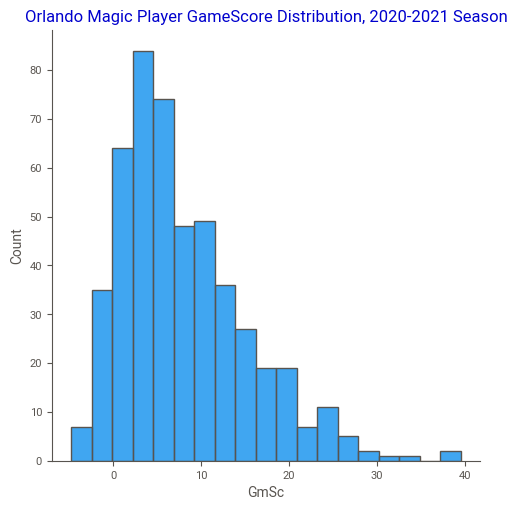

In [20]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()


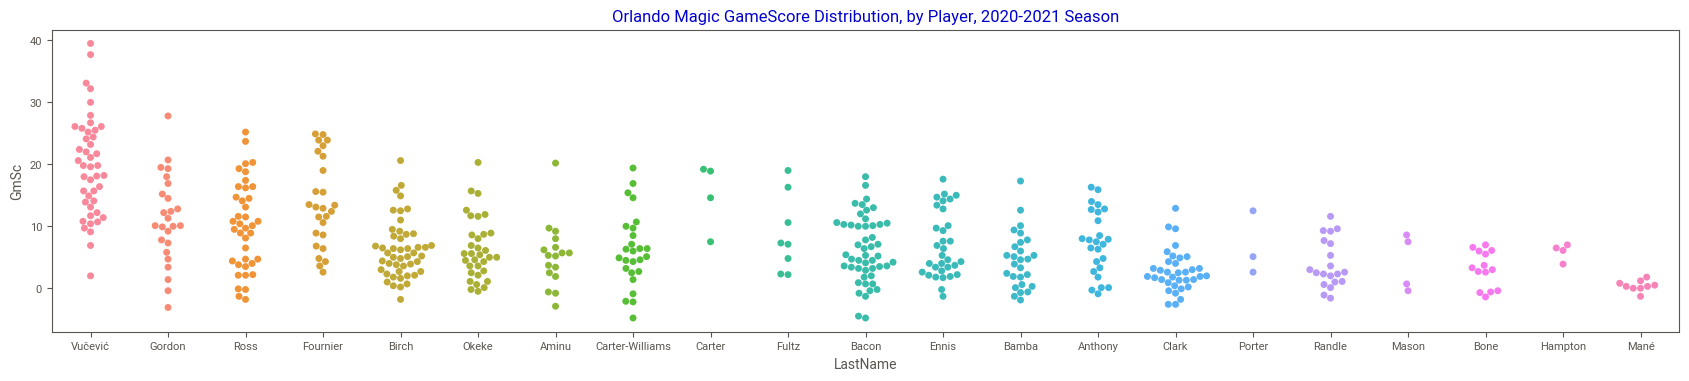

In [21]:
fig, ax = plt.subplots(figsize=(21,4))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()


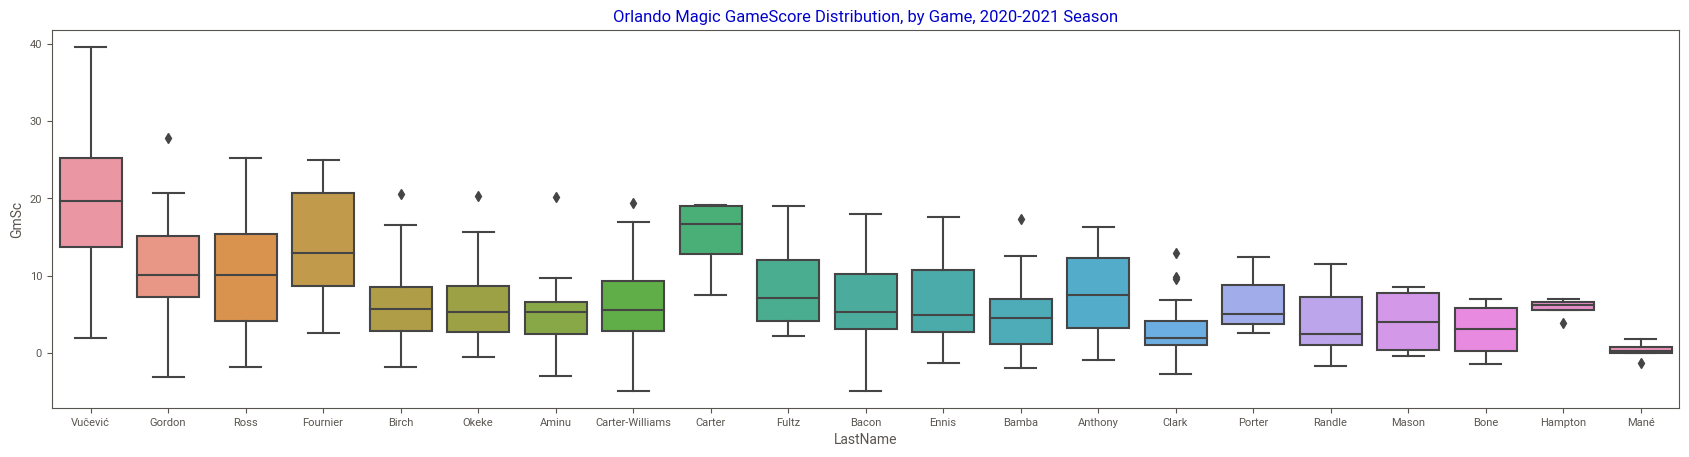

In [22]:
fig, ax = plt.subplots(figsize=(21,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


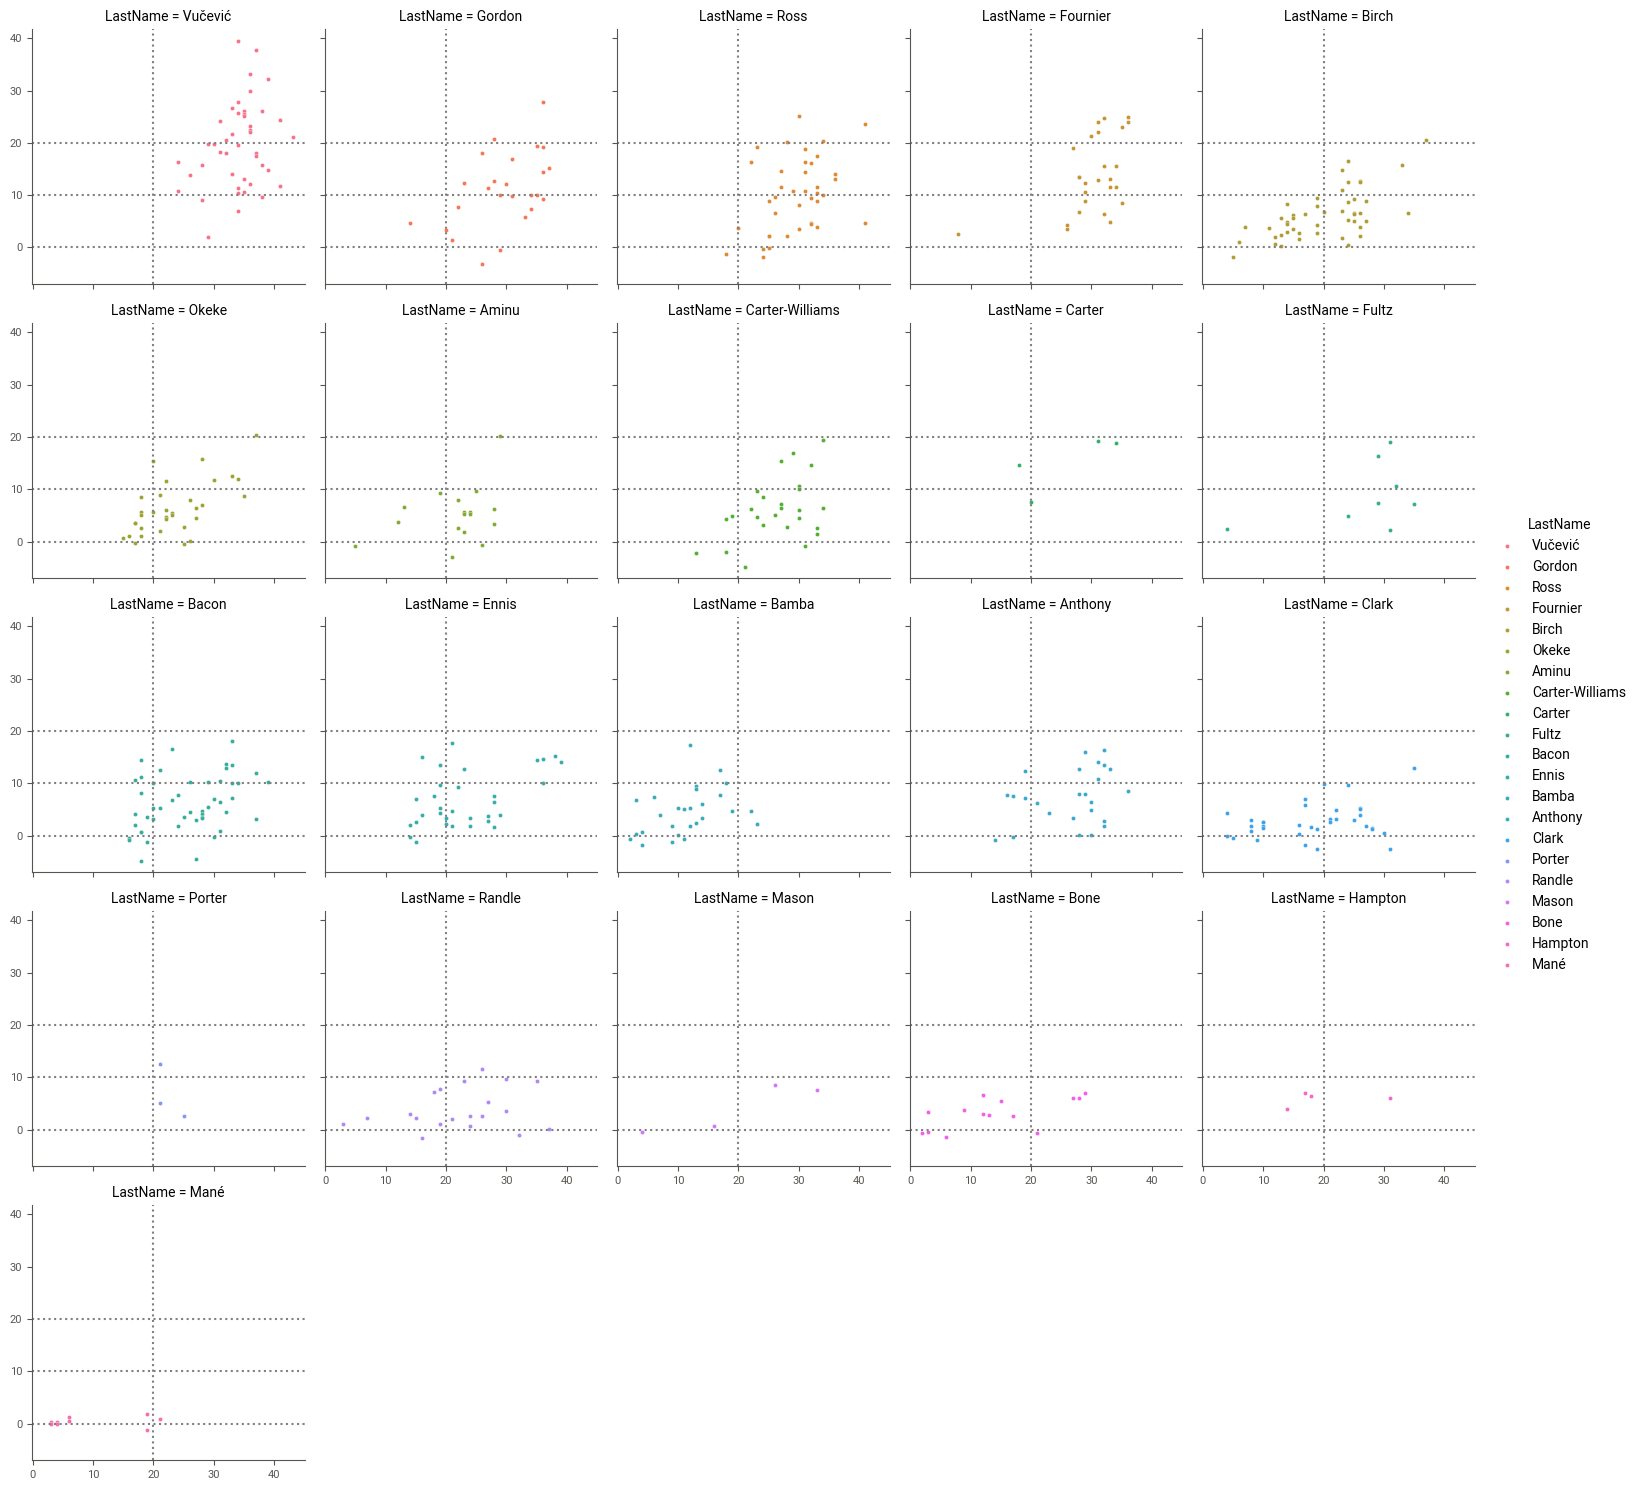

In [23]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

GameScore versus Date Game Played, by GmSc Rank


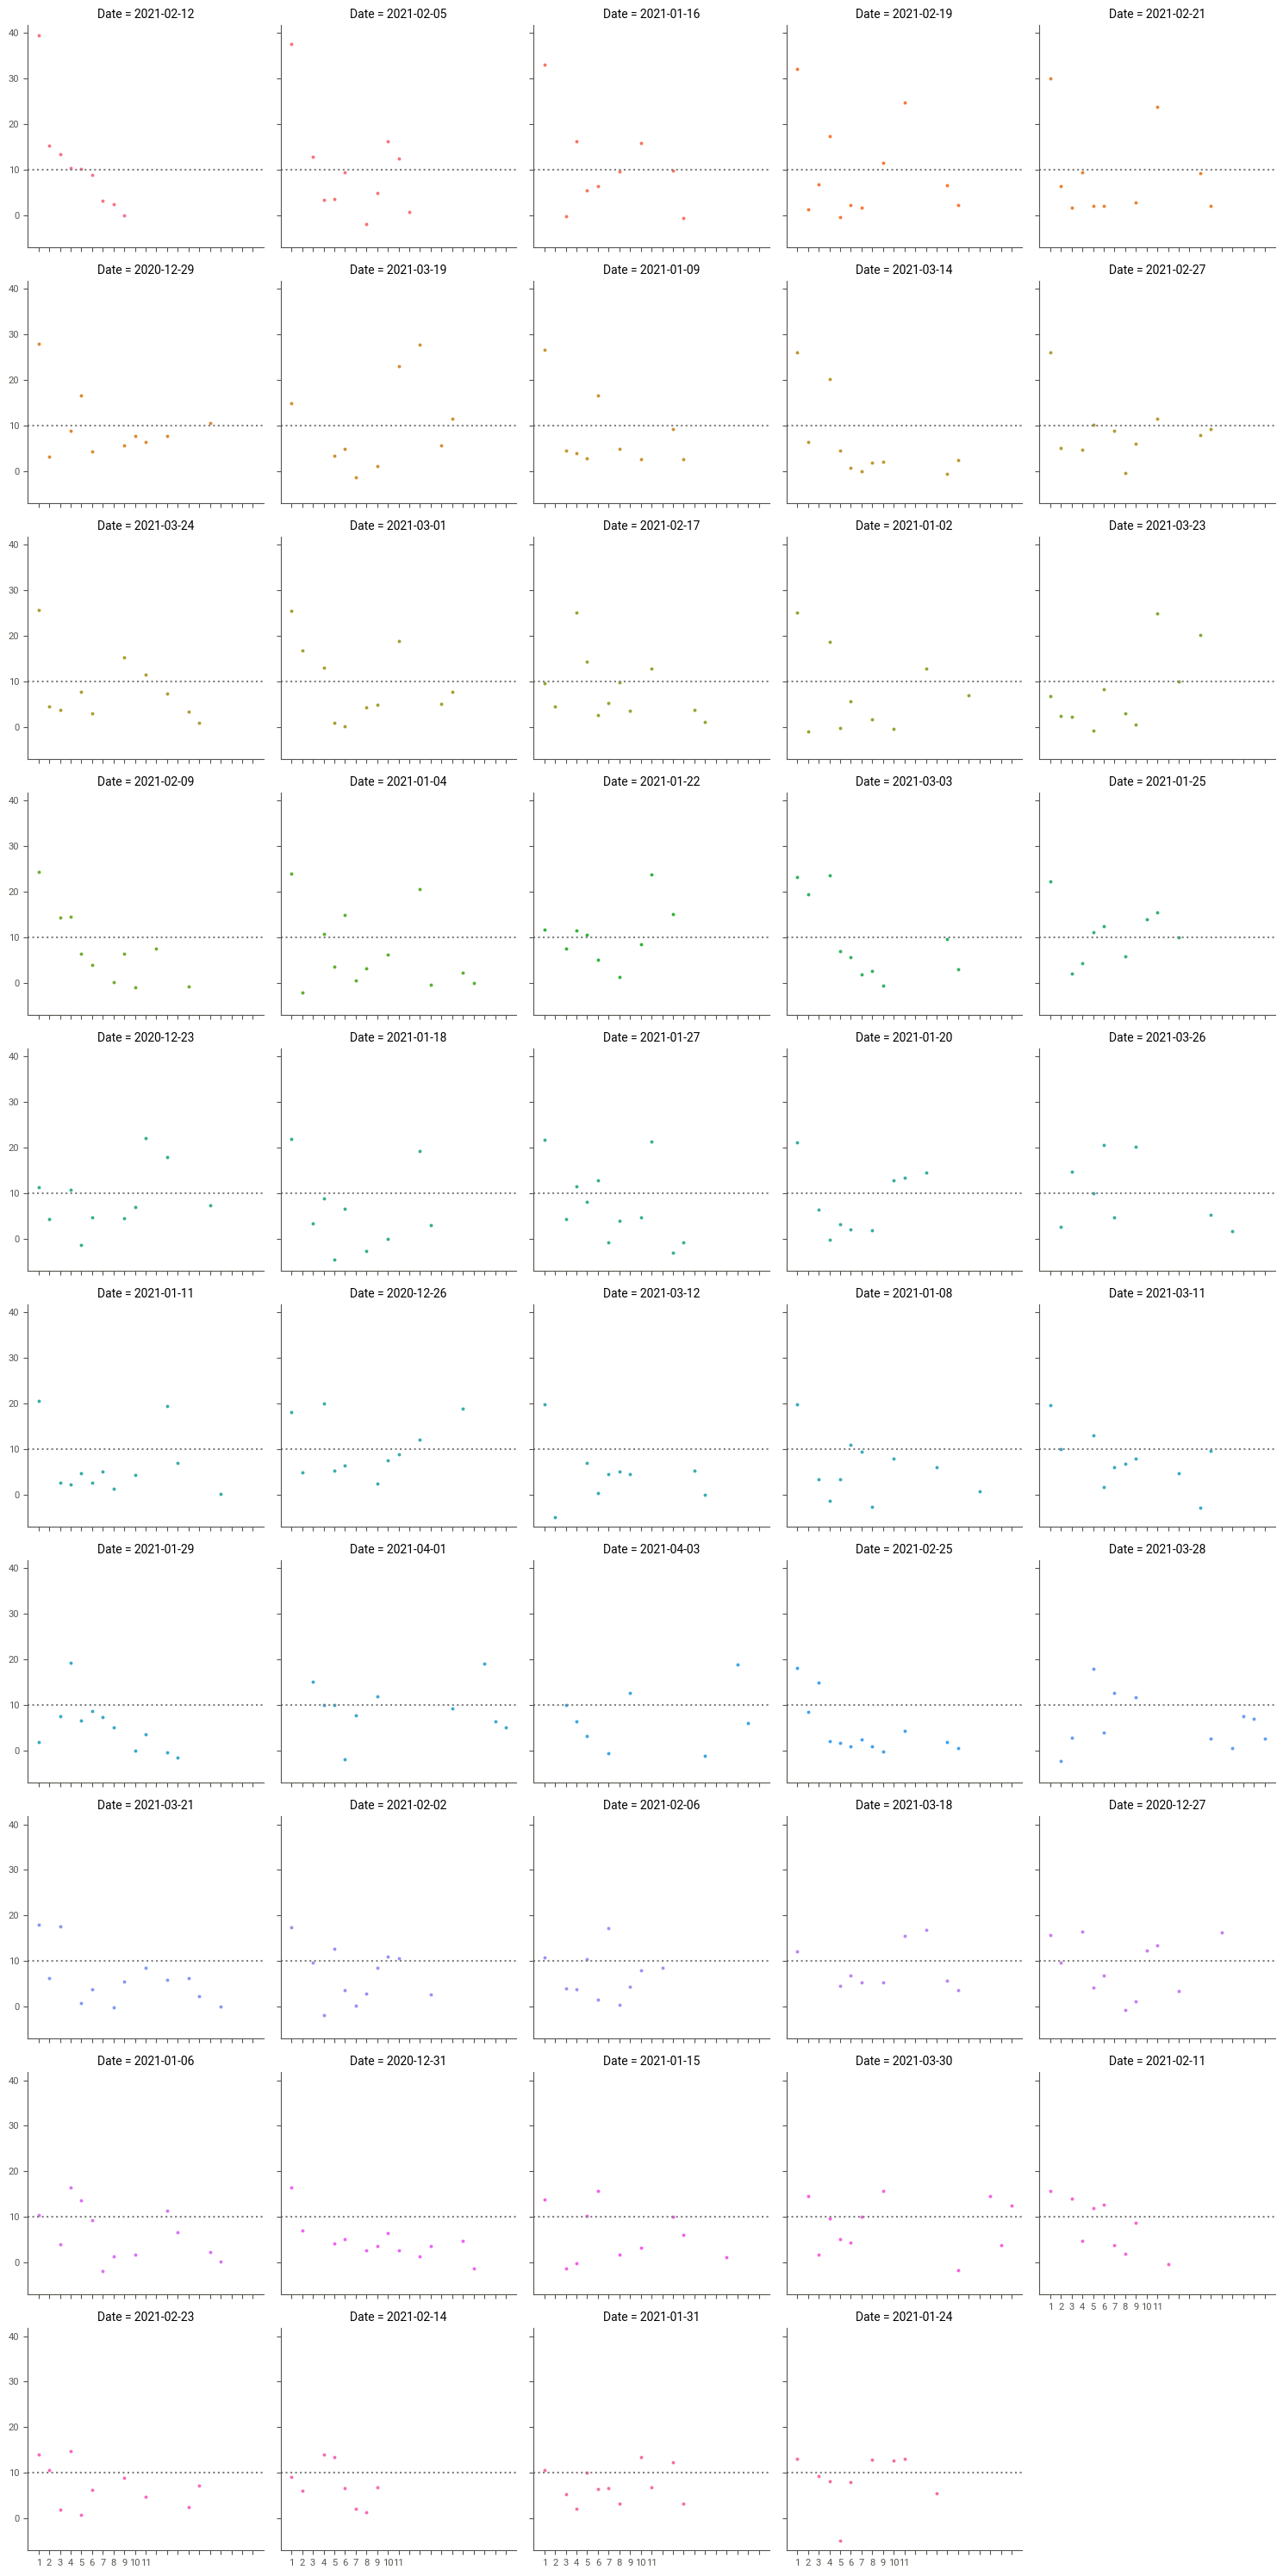

In [24]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

In [25]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Aminu            17.0   5.235294  5.192897 -2.9   2.500   5.30   6.600  20.2
Anthony          25.0   7.356000  5.208893 -0.9   3.300   7.50  12.300  16.3
Bacon            49.0   6.236735  5.277890 -4.8   3.200   5.30  10.300  18.0
Bamba            27.0   4.562963  4.547032 -1.9   1.200   4.60   7.050  17.3
Birch            47.0   6.297872  4.718027 -1.8   2.850   5.70   8.550  20.6
Bone             14.0   3.100000  2.936246 -1.4   0.350   3.15   5.875   7.0
Carter            4.0  15.050000  5.454356  7.5  12.825  16.75  18.975  19.2
Carter-Williams  26.0   6.176923  5.925829 -4.8   2.825   5.55   9.400  19.4
Clark            35.0   2.760000  3.364276 -2.6   1.100   2.00   4.150  12.9
Ennis            32.0   6.909375  5.274244 -1.3   2.750   4.95  10.775  17.6
Fournier         26.0  13.807692  7.129091  2.6   8.675  13.00  20.725  24.9
Fultz             8.0   8.700000  6.215189  2.2   4.175   7.20  12.025  19.0
Gordon           25.0  11.072000  7.112754 -3.1   7.300  10.10  15.200  27.8
Hampton           4.0   5.875000  1.367175  3.9   5.550   6.30   6.625   7.0
Mané              9.0   0.400000  0.866025 -1.3   0.000   0.30   0.800   1.8
Mason             4.0   4.100000  4.605070 -0.4   0.425   4.10   7.775   8.6
Okeke            33.0   6.351515  5.007564 -0.5   2.800   5.40   8.700  20.3
Porter            3.0   6.733333  5.148139  2.6   3.850   5.10   8.800  12.5
Randle           20.0   3.915000  3.882657 -1.6   1.075   2.55   7.325  11.6
Ross             39.0  10.130769  7.111375 -1.8   4.200  10.10  15.450  25.2
Vučević          44.0  19.659091  8.130572  2.0  13.700  19.70  25.275  39.5

In [26]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','MP']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc    MP
LastName                    
Vučević          865.0  1500
Ross             395.1  1151
Fournier         359.0   786
Bacon            305.6  1254
Birch            296.0   938
Gordon           276.8   737
Ennis            221.1   746
Okeke            209.6   769
Anthony          183.9   664
Carter-Williams  160.6   686
Bamba            123.2   308
Clark             96.6   637
Aminu             89.0   367
Randle            78.3   446
Fultz             69.6   215
Carter            60.2   103
Bone              43.4   197
Hampton           23.5    80
Porter            20.2    67
Mason             16.4    79
Mané               3.6    85


In [27]:
print ("\033[1m"+(colored("Total Minutes Played, by Player", 'blue'))+"\033[0m")
game_score = magic[['MP','LastName','GmSc']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['MP'], ascending=False)
print(sort_game_score)

Total Minutes Played, by Player
                   MP   GmSc
LastName                    
Vučević          1500  865.0
Bacon            1254  305.6
Ross             1151  395.1
Birch             938  296.0
Fournier          786  359.0
Okeke             769  209.6
Ennis             746  221.1
Gordon            737  276.8
Carter-Williams   686  160.6
Anthony           664  183.9
Clark             637   96.6
Randle            446   78.3
Aminu             367   89.0
Bamba             308  123.2
Fultz             215   69.6
Bone              197   43.4
Carter            103   60.2
Mané               85    3.6
Hampton            80   23.5
Mason              79   16.4
Porter             67   20.2


In [28]:
print ("\033[1m"+(colored("Aggregate Team GameScore, by Game", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','Date']].groupby(['Date']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Aggregate Team GameScore, by Game
             GmSc
Date             
2021-02-19  106.9
2020-12-26  105.0
2021-02-12  103.6
2021-02-05   99.7
2020-12-29   99.2
2020-12-27   98.6
2021-01-25   98.1
2021-03-01   97.8
2021-01-16   95.7
2021-03-03   95.7
2021-01-22   95.5
2021-04-01   93.3
2021-02-17   93.0
2021-03-19   91.3
2021-03-30   90.7
2021-02-27   89.7
2021-02-21   89.6
2020-12-23   89.1
2021-01-27   84.2
2021-01-04   83.9
2021-03-24   83.4
2021-01-31   80.5
2021-03-26   80.1
2021-03-23   78.0
2021-01-24   77.9
2021-02-02   77.5
2021-03-11   76.7
2021-02-09   76.2
2021-03-18   76.0
2021-01-06   75.4
2021-01-20   75.2
2021-03-21   74.8
2021-01-09   74.3
2021-02-11   73.3
2021-02-23   71.7
2021-01-11   70.3
2021-01-02   69.9
2021-02-06   69.3
2021-03-28   67.0
2021-03-14   64.0
2021-01-15   61.1
2021-02-14   59.8
2021-01-29   58.8
2021-01-08   57.8
2020-12-31   56.7
2021-02-25   56.4
2021-01-18   56.2
2021-04-03   55.7
2021-03-12   42.1


In [29]:
magic.describe()

,Rk,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,474.000000,491.000000,491.000000,450.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,246.000000,7.936253,0.498982,24.063136,3.847251,8.965377,0.410344,2.696538,5.682281,0.469447,...,1.048880,3.572301,4.621181,2.234216,0.684318,0.417515,1.236253,1.670061,10.401222,-2.304481
std,141.883755,7.243913,0.500509,8.865094,3.263760,6.225755,0.209155,2.500524,4.532521,0.273284,...,1.339225,2.891290,3.501469,2.117018,0.908092,0.721972,1.360218,1.348128,8.384870,9.527287
min,1.000000,-4.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.700000
25%,123.500000,2.600000,0.000000,18.000000,1.000000,4.000000,0.286000,1.000000,2.000000,0.310000,...,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.700000
50%,246.000000,6.400000,0.000000,25.000000,3.000000,8.000000,0.400000,2.000000,4.000000,0.500000,...,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,8.000000,-2.900000
75%,368.500000,11.950000,1.000000,31.000000,6.000000,13.000000,0.523500,4.000000,8.000000,0.636000,...,2.000000,5.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,2.850000
max,491.000000,39.500000,1.000000,43.000000,17.000000,29.000000,1.000000,13.000000,21.000000,1.000000,...,10.000000,16.000000,19.000000,10.000000,5.000000,4.000000,7.000000,6.000000,43.000000,60.300000


In [30]:
my_report = sv.analyze(magic)
my_report.show_html()

                                             |     | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
